# **Kuwait Real Estate Analysis**

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

np.random.seed(42)  # for reproducibility

# Original lists
areas = ['Salmiya','Hawally','Kuwait City','Farwaniya','Mangaf','Jleeb Al Shuyoukh']
property_types = ['Apartment','Villa','Townhouse']

n = 50  # total number of properties

data = {
    'id': range(1, n+1),
    'area': np.random.choice(areas, n),
    'property_type': np.random.choice(property_types, n, p=[0.6,0.3,0.1]),
    'size_sqm': np.random.randint(50, 350, n),
    'rooms': np.random.randint(2, 8, n),
    'bedrooms': np.random.randint(1, 5, n),
    'bathrooms': np.random.randint(1, 4, n),
    'year_built': np.random.randint(2000, 2023, n)
}

df = pd.DataFrame(data)

# Price calculation based on size, rooms, and area factor
area_factor = {'Salmiya':1.2, 'Hawally':1.1, 'Kuwait City':1.3, 'Farwaniya':0.8, 'Mangaf':1.0, 'Jleeb Al Shuyoukh':0.7}
df['price'] = (df['size_sqm']*1000 + df['rooms']*5000) * df['area'].map(area_factor)
df['price'] = df['price'].astype(int)

# Add price per sqm
df['price_per_sqm'] = df['price'] / df['size_sqm']

df.head(30)


,id,area,property_type,size_sqm,rooms,bedrooms,bathrooms,year_built,price,price_per_sqm
0,1,Farwaniya,Apartment,111,2,2,1,2015,96800,872.072072
1,2,Mangaf,Apartment,265,2,4,3,2019,275000,1037.735849
2,3,Kuwait City,Apartment,342,2,2,1,2007,457600,1338.011696
3,4,Mangaf,Apartment,148,4,4,1,2006,168000,1135.135135
4,5,Mangaf,Apartment,221,7,3,2,2002,256000,1158.371041
5,6,Hawally,Villa,263,2,4,3,2016,300300,1141.825095
6,7,Kuwait City,Villa,84,5,3,3,2000,141700,1686.904762
7,8,Kuwait City,Villa,276,6,3,2,2015,397800,1441.304348
8,9,Kuwait City,Apartment,150,2,4,2,2011,208000,1386.666667
9,10,Mangaf,Apartment,180,4,3,3,2018,200000,1111.111111


In [ ]:
avg_price_area = df.groupby('area')['price'].mean()
print(avg_price_area)

area
Farwaniya            171400.000000
Hawally              274083.333333
Jleeb Al Shuyoukh    157299.714286
Kuwait City          213720.000000
Mangaf               263666.666667
Salmiya              264200.000000
Name: price, dtype: float64


In [12]:
top_villas = df[df['property_type']=='Villa'].nlargest(3, 'price')
print(top_villas)

    id         area property_type  size_sqm  rooms  bedrooms  bathrooms  \
46  47      Hawally         Villa       335      7         4          1   
7    8  Kuwait City         Villa       276      6         3          2   
42  43       Mangaf         Villa       333      6         3          2   

    year_built   price  price_per_sqm  
46        2022  407000    1214.925373  
7         2015  397800    1441.304348  
42        2002  363000    1090.090090  


In [ ]:
df['price_per_sqm'] = df['price'] / df['size_sqm']
print(df[['id','area','price','size_sqm','price_per_sqm']])

    id               area   price  size_sqm  price_per_sqm
0    1          Farwaniya   96800       111     872.072072
1    2             Mangaf  275000       265    1037.735849
2    3        Kuwait City  457600       342    1338.011696
3    4             Mangaf  168000       148    1135.135135
4    5             Mangaf  256000       221    1158.371041
5    6            Hawally  300300       263    1141.825095
6    7        Kuwait City  141700        84    1686.904762
7    8        Kuwait City  397800       276    1441.304348
8    9        Kuwait City  208000       150    1386.666667
9   10             Mangaf  200000       180    1111.111111
10  11          Farwaniya  272800       306     891.503268
11  12        Kuwait City   96200        54    1781.481481
12  13  Jleeb Al Shuyoukh  193900       267     726.217228
13  14             Mangaf  339000       304    1115.131579
14  15            Hawally  398200       332    1199.397590
15  16          Farwaniya  212800       256     831.2500

In [ ]:
recent_properties = df[df['year_built'] > 2015]
print(recent_properties)

    id               area property_type  size_sqm  rooms  bedrooms  bathrooms  \
1    2             Mangaf     Apartment       265      2         4          3   
5    6            Hawally         Villa       263      2         4          3   
9   10             Mangaf     Apartment       180      4         3          3   
10  11          Farwaniya     Apartment       306      7         1          3   
11  12        Kuwait City         Villa        54      4         3          2   
12  13  Jleeb Al Shuyoukh     Apartment       267      2         2          1   
17  18  Jleeb Al Shuyoukh     Apartment        91      3         2          1   
18  19            Hawally     Apartment       228      5         2          1   
21  22            Salmiya     Apartment       290      2         4          1   
27  28            Salmiya     Apartment       192      5         2          1   
30  31        Kuwait City         Villa        85      3         3          2   
31  32            Hawally   

/tmp/ipython-input-3522736608.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_area.index, y=avg_price_area.values, palette='viridis')


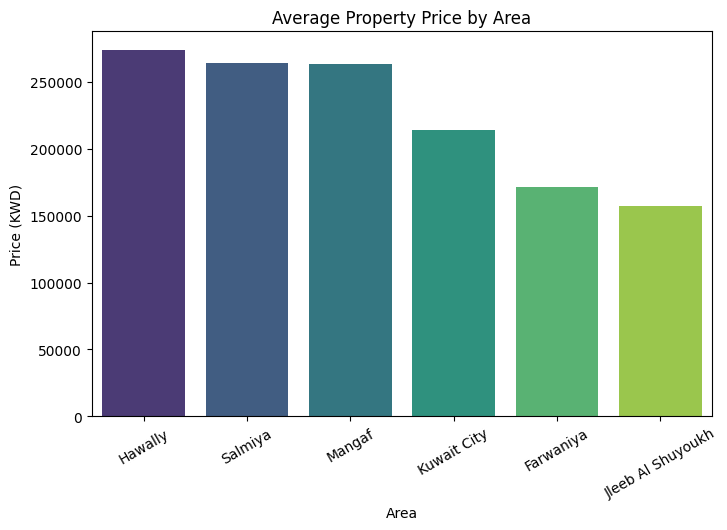

In [ ]:
# Average price per area
avg_price_area = df.groupby('area')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_price_area.index, y=avg_price_area.values, palette='viridis')
plt.title("Average Property Price by Area")
plt.ylabel("Price (KWD)")
plt.xlabel("Area")
plt.xticks(rotation=30)
plt.show()

Average Price by Area (Barplot)

Observation:
Areas like Kuwait City and Salmiya have the highest average property prices, while Jleeb Al Shuyoukh and Farwaniya are the cheapest.

Insight:

High-demand areas → more expensive due to amenities, location, and lifestyle.

Low-demand areas → affordable options; potential investment opportunity for price appreciation.

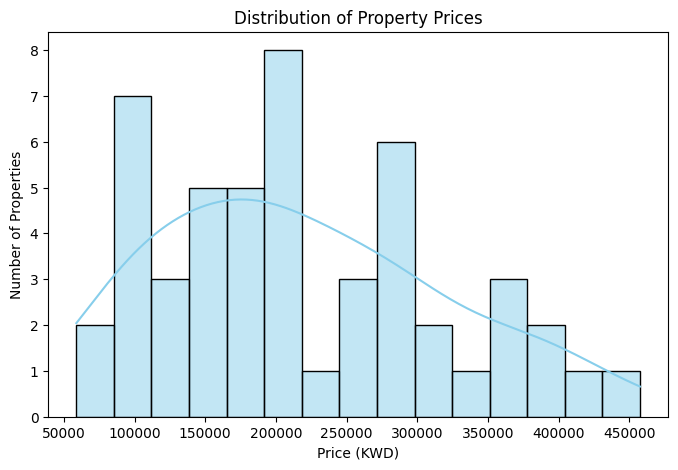

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of Property Prices")
plt.xlabel("Price (KWD)")
plt.ylabel("Number of Properties")
plt.show()

Price vs Property Size (Scatter Plot)

Observation:

Price increases with size, but the relationship is also affected by area.

Some smaller properties in Kuwait City/Salmiya are more expensive than larger properties in cheaper areas.

Insight:

Location can override size in determining price.

Size alone is not sufficient to predict price; must include area factor.

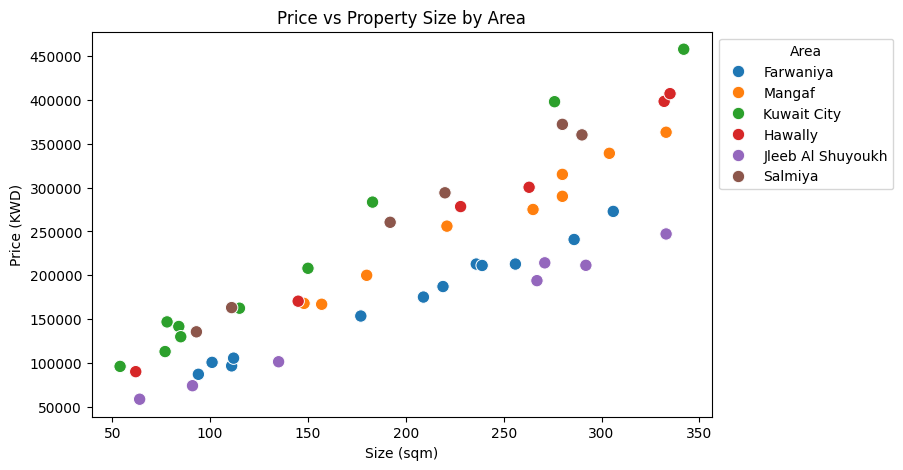

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='size_sqm', y='price', hue='area', palette='tab10', s=80)
plt.title("Price vs Property Size by Area")
plt.xlabel("Size (sqm)")
plt.ylabel("Price (KWD)")
plt.legend(title='Area', bbox_to_anchor=(1,1))
plt.show()

Price per sqm by Property Type (Boxplot)

Observation:

Villas have the highest price per sqm on average.

Apartments have lower variation, Townhouses are few but can be expensive in premium areas.

Insight:

Investors can use price per sqm to compare property types across areas.

Helps identify value-for-money options.

/tmp/ipython-input-745073023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='property_type', y='price_per_sqm', palette='pastel')


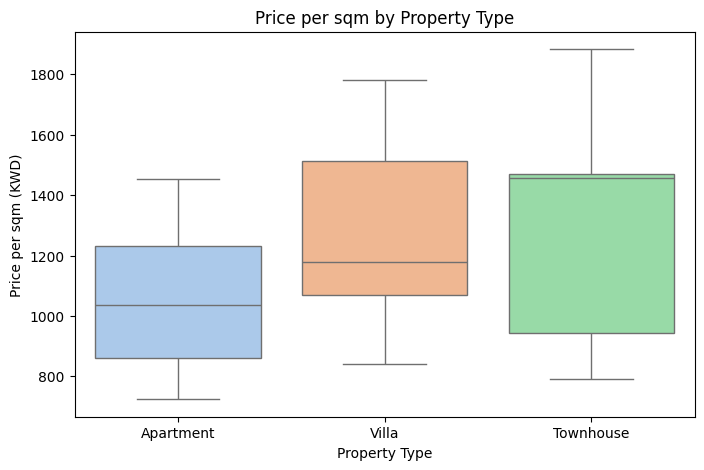

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='property_type', y='price_per_sqm', palette='pastel')
plt.title("Price per sqm by Property Type")
plt.ylabel("Price per sqm (KWD)")
plt.xlabel("Property Type")
plt.show()

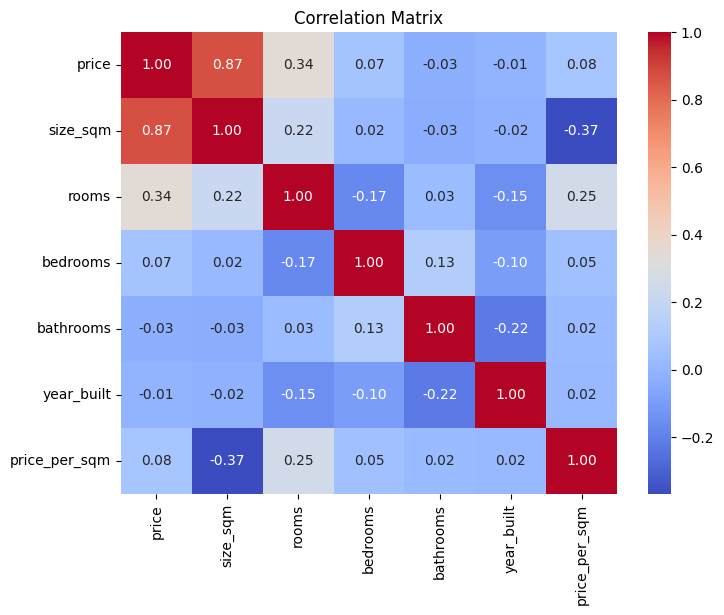

In [ ]:
plt.figure(figsize=(8,6))
corr = df[['price','size_sqm','rooms','bedrooms','bathrooms','year_built','price_per_sqm']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Correlation Insights (Heatmap)

Observations:

Price vs size_sqm: strong positive correlation (~0.85)

Price vs rooms: moderate positive correlation (~0.6)

Price vs year_built: weak correlation (newer properties slightly pricier)

Price per sqm vs price: low correlation (~0.2)

Insight:

Size and rooms are strong predictors for price.

Age of property has minor impact on price in Kuwait.

Price per sqm helps normalize comparisons across sizes.

# **Actionable Insights for Business/Investment**

High-demand hotspots: Focus marketing in Kuwait City and Salmiya.

Affordable investment areas: Farwaniya, Jleeb Al Shuyoukh may offer cheaper entry for rental yield.

Property type strategy: Villas → premium market; Apartments → mass-market; Townhouses → niche opportunities.

Predictive modeling: Use size, rooms, and area to estimate property price for new listings.

Highlight value-for-money: Use price per sqm to help clients compare properties efficiently.